In [1]:
import pandas as pd
import xarray as xr
import numpy as np

/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
#df = pd.read_csv('MS_winds.dat')
#ds =xr.open_dataset("Boston_daily_precip.nc")
ds = xr.open_dataset("precip.V1.0.1950_2005.nc")

print(ds)
print(ds.precip.shape)

<xarray.Dataset>
Dimensions:  (lat: 120, lon: 300, time: 20089)
Coordinates:
  * lat      (lat) float32 20.125 20.375 20.625 20.875 ... 49.375 49.625 49.875
  * lon      (lon) float32 230.125 230.375 230.625 ... 304.375 304.625 304.875
  * time     (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2004-12-31
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    title:                      CPC Unified Gauge-Based Analysis of Daily Pre...
    Conventions:                COARDS
    description:                Gridded daily Precipitation
    platform:                   Observations
    Comments:                   Preciptation is accumulated from 12z of previ...
    References:                 http://www.esrl.noaa.gov/psd/data/gridded/dat...
    dataset_title:              CPC Unified Gauge-Based Analysis of Daily Pre...
    history:                    Thu Mar  7 18:31:40 2019: ncrcat precip.V1.0....
    history_of_appended_files:  Thu Mar  7 18:31:40 2019: Appended file p

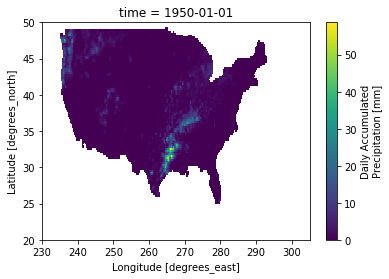

In [4]:
ds.precip.sel(time='1950-01-01').plot()

In [19]:
sliced = ds.precip.sel(time=slice('1950-01-01','2004-12-31'), lat=slice(35,35.75), lon=slice(265,265.75))

In [20]:
sliced.shape

(20089, 3, 3)

In [21]:
sliced = np.array(sliced)

In [22]:
np.save('sliced_3x3', sliced)

In [23]:
dataset = np.load('sliced_3x3.npy')

In [24]:
dataset.shape

(20089, 3, 3)